In [1]:
# !pip install selenium
# !pip install webdriver-manager
# !pip install bs4
# !pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
import os
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD
from lime.lime_tabular import LimeTabularExplainer
import requests
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
#from unidecode import unidecode  # Se usa???? 
import re
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

TRABAJO PRACTICO - Integrador: GRUPO 8
#Autores:

- Choconi Lucas
- Berra Eliel
- Mina Federico
- Scillato German

In [2]:
# data_true_location_eliel = '~/Downloads/DHDS/TP Final/git_fake_news/data/True.csv'
# data_fake_location_eliel = '~/Downloads/DHDS/TP Final/git_fake_news/data/Fake.csv'
# # data_true_location_lucas = 'C:\\Users\\Lucas Choconi\\Documents\\DH\\Datasets\\fakenews\True.csv'
# # data_fake_location_lucas = 'C:\\Users\\Lucas Choconi\\Documents\\DH\\Datasets\\fakenews\Fake.csv'
# # data_true_location_ger = ''
# # data_fake_location_ger = ''

In [3]:
# Dataset from https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
file_names_true = pd.read_csv('./data/True.csv')
file_names_true['real'] = 'True'
file_names_fake = pd.read_csv('./data/Fake.csv')
file_names_fake['real'] = 'Fake'
data = file_names_fake.append(file_names_true, ignore_index=True)
data.head(1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9752\636282420.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = file_names_fake.append(file_names_true, ignore_index=True)


,title,text,subject,date,real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake


In [4]:
# Trabar 1ero con texto y después con el título

In [5]:
# Unimos el título y el contenido del artículo en una sola columna
data['text'] = data['title'] + ' --- ' + data['text'] 

# Porque con with?????? 

with pd.option_context('display.max_colwidth', None):
  print(data.head(1))
data = data.drop(columns = 'title')

                                                                             title  \
0   Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [6]:
# Algunas filas contienen datos erróneos que impiden transformar la columna 'date' a formato fecha
wrong_row = data['date'] == 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/'
data[wrong_row]

,text,subject,date,real
9358,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,Fake


In [7]:
# Las filas que no pueden ser correctamente transformadas a datetime serán utilizadas en una máscara booleana
# para poder eliminarlas
data['date'] = data['date'].apply(lambda x: pd.to_datetime(x, infer_datetime_format = True)\
                                                           if re.search('[a-z-A-Z]+ [0-9]+, [0-9]{4}', x) else
                                                            np.NaN)
delete_mask = data['date'].notna()
data = data[delete_mask]
data = data.reset_index()
data['date'] = data['date'].astype('datetime64')

In [8]:
# Separamos los datos en las filas que contienen noticias falsas de las que son reales
data_real = data[data['real'] == 'True']

data_fake = data[data['real'] == 'Fake']

In [9]:
# Averiguamos cuál es el largo promedio de las noticias falsas y de las reales y hacemos un gráfico comparativo
#data['text_len'] = data['text'].apply(lambda x: len(word_tokenize(x)))
#real_len_avg = data_real['text_len'].mean()
#fake_len_avg = data_fake['text_len'].mean()
#len_avgs = [real_len_avg, fake_len_avg]
#plt.bar(['Real', 'Fake'], len_avgs)

In [10]:
'''
# Lista con todas las palabras en inglés https://github.com/dwyl/english-words/blob/master/words.txt
all_eng_words = pd.read_csv('./data/all_english_words.csv')
all_eng_words = pd.Series(all_eng_words.iloc[:,0])
all_eng_words = all_eng_words.apply(lambda x: x.lower() if type(x) == str else x)

def words_percentage(text):
    # Devuelve el porcentaje de palabras que posee un texto que están dentro de un diccionario
    words = word_tokenize(text)
    words = [re.sub('[^A-Za-z0-9]+', '', word) for word in words] 
    words_in_dict = [word for word in words if word in all_eng_words.values]
    words_in_dict_percentage = len(words_in_dict) * 100 / len(words)
    return words_in_dict_percentage

tqdm.pandas()
data['words_in_dict_pct'] = data['text'].progress_apply(words_percentage)
'''
'''Esta celda demora 35hs en ejecutarse.'''

'Esta celda demora 35hs en ejecutarse.'

<AxesSubplot:xlabel='subject', ylabel='Count'>

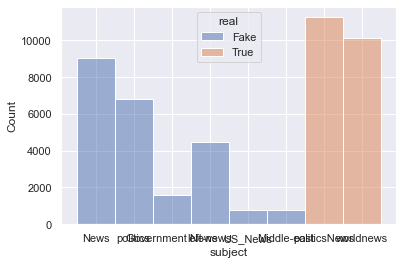

In [11]:
sns.set(rc={'figure.figsize':(12, 4)})
sns.histplot(data = data, x = 'subject', hue = 'real')


################### Acomodar GRAFICO, eje x.

In [12]:
# Como hay valores diferentes en la columna "subject" para las noticias reales y las falsas borramos esa columna
data = data.drop(columns = 'subject')

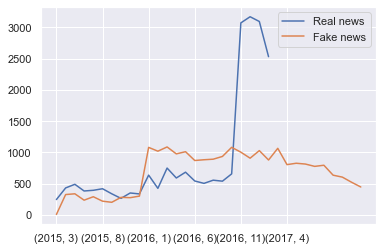

In [13]:
# Hacemos un gráfico mostrando el conteo de cuántas noticias falsas y cuántas verdaderas se publicaron 
# por mes en el dataset 
ax = data_real['date'].groupby([data_real["date"].dt.year, data_real["date"].dt.month]).count().plot.line(label = 'Real news')
ax = data_fake['date'].groupby([data_fake["date"].dt.year, data_fake["date"].dt.month]).count().plot.line(label = 'Fake news')
ax.set(xlabel=None)
ax.legend()

################### Agregar titulo gráfico

El pico de noticias verdaderas publicadas en Noviembre del 2016 coincide con las elecciones presidenciales de Estados Unidos

In [14]:
# El dataset no valores nulos así que damos por finalizada la limpieza
data.isna().sum()

index    0
text     0
date     0
real     0
dtype: int64

# Pre-procesamiento

In [15]:
stopwords_en = stopwords.words('english')

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_pos = np.array(Image.open(path.join(d, "Thumbs.png")))
mask_neg = np.array(Image.open(path.join(d, "Thumbsdw.png")))

wordcloud_fake = WordCloud(stopwords=stopwords_en,
            mask=mask_neg, 
            max_words=500,
            background_color="white").generate(data[data['real']=='Fake'].text.str.cat(sep=' '))
wordcloud_true = WordCloud(stopwords=stopwords_en,
            mask=mask_pos,
            max_words=500,
            background_color="white").generate(data[data['real']=='True'].text.str.cat(sep=' '))

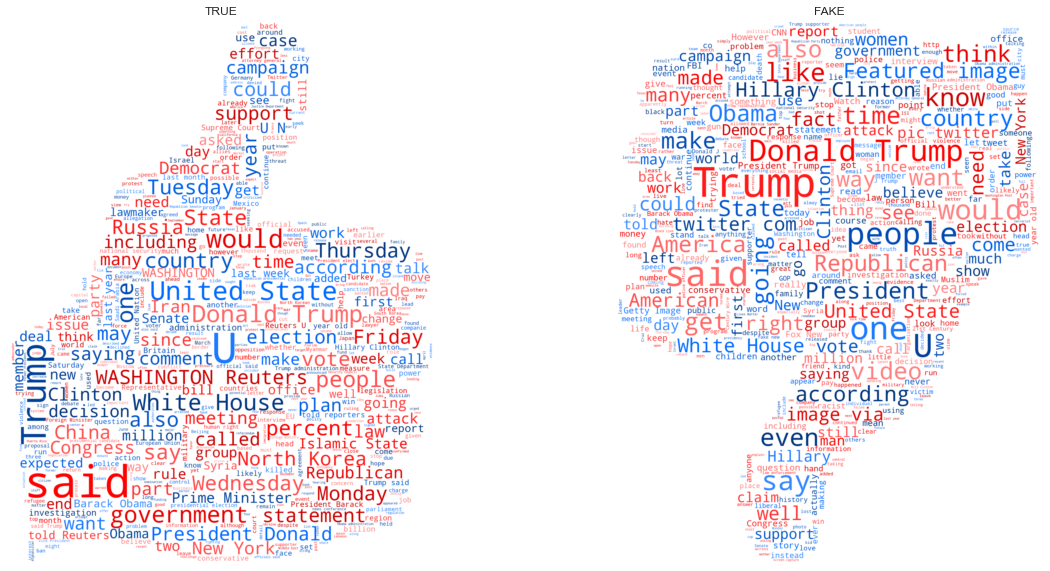

In [16]:
def blue_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    """Argumentos de función necesarias para metodo worldcloud"""
    blues = "hsl(215,100%%, %d%%)" % np.random.choice(np.arange(25, 65, 5, dtype=int))
    reds = "hsl(0,100%%, %d%%)" % np.random.choice(np.arange(40, 80, 5, dtype=int))
    choice = np.random.choice([0, 1])
    if choice == 0:
        return blues
    else:
        return reds

fig, axs = plt.subplots(1, 2,figsize=(20,10))  

axs[1].imshow(wordcloud_fake.recolor(color_func=blue_color_func, random_state=3),interpolation="bilinear")
axs[1].axis("off")
axs[1].title.set_text('FAKE')
axs[0].imshow(wordcloud_true.recolor(color_func=blue_color_func, random_state=3),interpolation="bilinear")
axs[0].axis("off")
axs[0].title.set_text('TRUE')
plt.show()

In [17]:
testing_sample_size = 1000 # Algunas operaciones se demoran mucho tiempo, tamaño pequeño es para agilizarlas

data_sample = data.sample(testing_sample_size)
X = data_sample['text']
y = data_sample['real']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
porter = PorterStemmer()
stopwords_en_porter = [porter.stem(x) for x in stopwords_en]


In [19]:
# Agrego Stopwords específicas del dataset.
def append_stopword(listado_stopwords, stopwords_agregar):
    for stopwords in stopwords_agregar:
        listado_stopwords.append(stopwords)
    return listado_stopwords

stopwords_agregar = ['reuter','said','Reuters','via','imag','https','com','one',
'u','also','would','featur','pic','us','wednesday','friday','monday','tuesday',
'saturday','sunday','thursday','getti','read','gop','watch','donald','trump',
'hillari','mr','accord','america','seem','youtub','21st']

stopwords_en_porter = append_stopword(stopwords_en_porter ,stopwords_agregar )

In [20]:
def porter_tokenizer(text):
    ''' Esta función se utiliza cuando se sobre escribe el proceso
    de tokenización en la clase CountVectorizer para que se pueda
     obtener también la raíz de la palabra.'''
    words = word_tokenize(text)
    words = [re.sub('[^A-Za-z0-9]+', '', word) for word in words]  # remover los caracteres especiales
    words = [word.replace(' ', '') for word in words] #remover los espacios en blanco
    words = [word for word in words if word != '']
    words = [PorterStemmer().stem(word) for word in words] # obtener la raiz de las palabras
    words = [word for word in words if word not in stopwords_en_porter] # remover las stopwords
    return words

In [21]:
import warnings
warnings.filterwarnings('ignore')
# Cuando se pasa un callable como argumento para modificar el comportamiento predeterminado de alguna etapa
# del preprocesamiento del texto del CountVectorizer se emite un warning. Por lo que investigamos a las
# stopwords que se pasen como argumento se les va a aplicar la misma función que se pasa como callable para
# pre procesarlas.

In [22]:
# Esta celda se demora un poco en ejecutarse
# La ventaja de este CountVectorizer customizado es que permite obtener la raíz de la palabra
customized_vectorizer= CountVectorizer(lowercase = True,
                                        strip_accents='unicode', 
                                        tokenizer = porter_tokenizer,
                                        ngram_range = (1, 3),
                                        min_df = 3)

##### usar fit_transform?????????
customized_vectorizer.fit(X_train)
customized_vectorizer_matrix = customized_vectorizer.transform(X_train)
customized_vectorizer_df = pd.DataFrame(customized_vectorizer_matrix.todense(),
                                        columns=customized_vectorizer.get_feature_names())

customized_vectorizer_test = customized_vectorizer.transform(X_test)
customized_vectorizer_df.head(2)

,0,1,1 billion,1 million,1 trillion,10,10 day,10 percent,10 year,100,...,zanupf,zealand,zealand dollar,zealand first,zealand first parti,zero,zika,zika viru,zimbabw,zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
customized_vectorizer_df.head(2)

,0,1,1 billion,1 million,1 trillion,10,10 day,10 percent,10 year,100,...,zanupf,zealand,zealand dollar,zealand first,zealand first parti,zero,zika,zika viru,zimbabw,zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
tfidf_matrix = TfidfTransformer().fit_transform(customized_vectorizer_matrix)
tfidf_df = pd.DataFrame(tfidf_matrix.todense(), columns = customized_vectorizer.get_feature_names())
tfidf_df.head(2)
# BUG: agregue fit al transform de la siguiente línea.
tfidf_matrix_test = TfidfTransformer().fit_transform(customized_vectorizer_test) 

In [25]:
def select_n_components(var_ratio, goal_var: float) -> int: 
    ''' Esta función se utiliza para hacer un cambio de base y lograr explicar
    el porcentaje de los datos que se pasa en el argumento goal_var.
    Fuente https://chrisalbon.com/code/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
    Fue modificada para que hiciera un gráfico de la varianza explicativa del
    modelo de acuerdo al número de componentes'''
    # Set initial variance explained so far
    total_variance = 0.0
    # Set initial number of features
    n_components = 0
    # Listas del nuḿero de componentes y de la explicación de varianza alcanzada para poder graficarlas
    num_components = list(range(1, len(var_ratio) + 1))
    variances = []
    # For the explained variance of each feature:
    found_n_components = False
    for explained_variance in var_ratio:
        # Add the explained variance to the total
        total_variance += explained_variance
        # Add one to the number of components
        n_components += 1
        # Agregar la varianza explicada al listado 
        variances.append(total_variance)
        # If we reach our goal level of explained variance and we haven't reached our desired variance
        if total_variance >= goal_var and found_n_components == False:
            desired_n_components = n_components
            found_n_components = True
            desired_variance = total_variance
    plt.plot(num_components, variances)
    plt.scatter(desired_n_components, desired_variance, c = 'r')
    plt.xlabel('Número de componentes')
    plt.ylabel('Razón de la explicación de la varianza')
    plt.hlines(desired_variance, 0, desired_n_components, 'r', 'dashed')
    plt.vlines(desired_n_components, 0, desired_variance, 'r', 'dashed')
        
    # Return the desired number of components. 
    # Tipo de variable devuelta definido por " -> int " PEP3107
    return desired_n_components

Número de componentes antes del cambio de base: 8844
Número de componentes después del cambio de base: 520
Hay 8324 componentes menos gracias al cambio de base


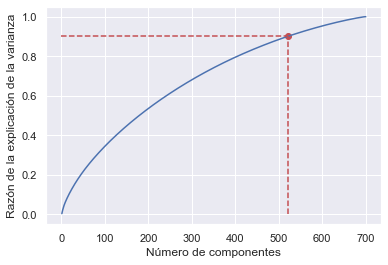

In [26]:
# Esta celda demora en ejecutarse
# Tener en cuenta que si el número de filas de la matrix esparsa es menor al número de componentes elegido
# como hiperparámetro, una vez que se haya realizado la transformación SVD el número de componentes 
# obtenido será igual al número de filas de la matriz esparsa, y no será el número de componentes
# elegido como hiperpárametro
test_svd = TruncatedSVD(n_components = tfidf_matrix.shape[1] - 1);
test_svd.fit(tfidf_matrix)
tsvd_var_ratios = test_svd.explained_variance_ratio_
desired_threshold = 0.90
n_components = select_n_components(tsvd_var_ratios, desired_threshold)
n_components_dif = tfidf_df.shape[1] - n_components
print(f'Número de componentes antes del cambio de base: {tfidf_df.shape[1]}')
print(f'Número de componentes después del cambio de base: {n_components}')
print(f'Hay {n_components_dif} componentes menos gracias al cambio de base')

Número de componentes antes del cambio de base: 8844
Número de componentes después del cambio de base: 18
Hay 8826 componentes menos gracias al cambio de base


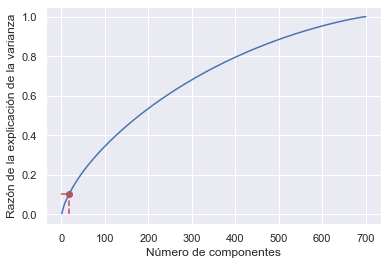

In [27]:
# Esta celda demora en ejecutarse
# Evaluamos cómo responde el cambio de base cuando seleccionamos una explicación
# de la varianza mucho menor
test_svd = TruncatedSVD(n_components = tfidf_matrix.shape[1] - 1);
test_svd.fit(tfidf_matrix)
tsvd_var_ratios = test_svd.explained_variance_ratio_
desired_threshold = 0.10
n_components = select_n_components(tsvd_var_ratios, desired_threshold)
n_components_dif = tfidf_df.shape[1] - n_components
print(f'Número de componentes antes del cambio de base: {tfidf_df.shape[1]}')
print(f'Número de componentes después del cambio de base: {n_components}')
print(f'Hay {n_components_dif} componentes menos gracias al cambio de base')

In [28]:
# Evaluar el comportamiento de la curva cuando hay 5k registros o más

In [29]:
# Esta celda demora en ejecutarse
svd = TruncatedSVD(n_components = n_components)
svd_matrix = svd.fit_transform(tfidf_matrix)
svd_df = pd.DataFrame(svd_matrix)
print(svd_df.head(2))

svd_test = svd.transform(tfidf_matrix_test)

         0         1         2         3         4         5         6   \
0  0.239118  0.053576 -0.093792 -0.033683  0.063097 -0.016149 -0.054989   
1  0.202376  0.126640  0.038659  0.144932  0.263282 -0.111484 -0.029505   

         7         8         9         10        11        12        13  \
0 -0.001531 -0.004343 -0.098059  0.113283  0.000087  0.048895  0.142770   
1  0.015040  0.008380  0.029301 -0.187658 -0.191123  0.048532 -0.083264   

         14        15        16        17  
0  0.136862  0.009278 -0.120990 -0.242483  
1 -0.067306 -0.077203 -0.052145 -0.023673  


## Fature selection

# Modelos

In [30]:
X_train = tfidf_df
X_test = tfidf_matrix_test

## Naive Bayes

In [31]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
NB_model.score(X_test, y_test)

0.8866666666666667

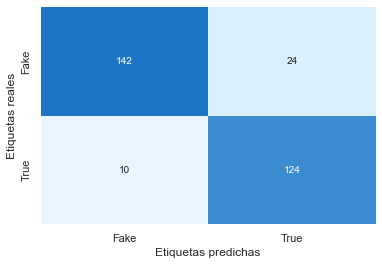

In [32]:
myColors = ((0.90, 0.96, 1, 1), (0.70, 0.87, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
axis_labels = np.sort(y_test.unique())
cm_nb = confusion_matrix(y_test, NB_model.predict(X_test))
sns.heatmap(cm_nb, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

#### Modelo de Reg. Logistica

In [33]:
reg_model = LogisticRegression(C = 7, solver="saga", l1_ratio=0.5 ,
                                 penalty="elasticnet", n_jobs=-1)
reg_model.fit(X_train, y_train)
reg_model.score(X_test, y_test)

0.9

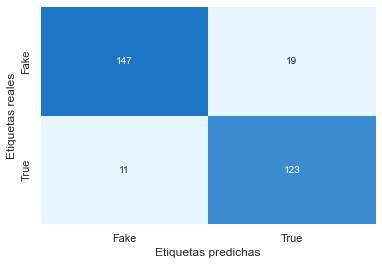

In [34]:
cm_rlog = confusion_matrix(y_test, reg_model.predict(X_test))
sns.heatmap(cm_rlog, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [35]:
"""
REVISAR este cambio
# CAmbio custom_vectorizer por customized_vectorizer,
X_train_dense = pd.DataFrame(X_train.todense(), 
             columns = customized_vectorizer.get_feature_names()) """

Coef_reg_model = pd.DataFrame(np.transpose(reg_model.coef_), index=X_train.columns, columns=['Coef'])
Coef_reg_model['coef_abs'] = abs(Coef_reg_model['Coef'])
Coef_reg_model = Coef_reg_model.reset_index(-1)
Coef_reg_model['words'] = Coef_reg_model['index'] 
Coef_reg_model['freq'] = (round(Coef_reg_model['coef_abs'] / Coef_reg_model.coef_abs.sum() * Coef_reg_model.shape[0] * 1000 , 0)).apply(lambda x: int(x))
Coef_reg_model['odds_direction'] = Coef_reg_model['Coef'].apply(lambda x: 'Negative' if x<0 else 'Positive')
Coef_reg_model_positive = Coef_reg_model[Coef_reg_model['odds_direction']=='Positive']
Coef_reg_model_positive = Coef_reg_model_positive.drop(['Coef' ,'coef_abs', 'index', 'odds_direction'], axis=1)
Coef_reg_model_negative = Coef_reg_model[Coef_reg_model['odds_direction']=='Negative']
Coef_reg_model_negative = Coef_reg_model_negative.drop(['Coef' ,'coef_abs', 'index', 'odds_direction'], axis=1)

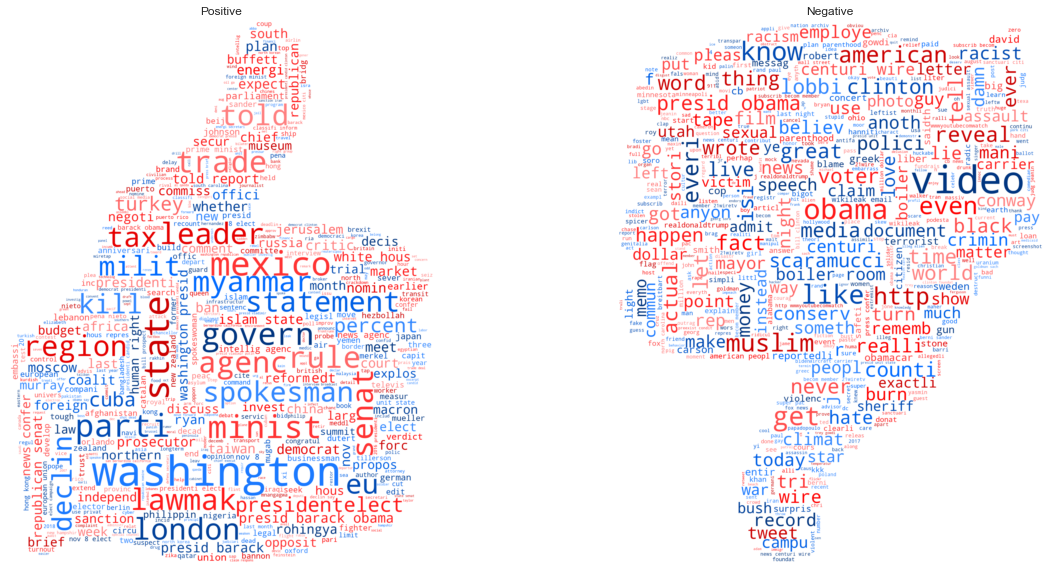

In [36]:
tuples_pos = Coef_reg_model_positive.set_index('words').T.to_dict('index')
tuples_neg = Coef_reg_model_negative.set_index('words').T.to_dict('index')

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask_pos = np.array(Image.open(path.join(d, "Thumbs.png")))
mask_neg = np.array(Image.open(path.join(d, "Thumbsdw.png")))

wordcloud_positive = WordCloud(max_words=500, mask=mask_pos, background_color="white").generate_from_frequencies(dict(tuples_pos['freq']))
wordcloud_negative = WordCloud(max_words=500, mask=mask_neg,background_color="white").generate_from_frequencies(dict(tuples_neg['freq']))

fig, axs = plt.subplots(1, 2,figsize=(20,10))
# Display the generated image:
axs[0].imshow(wordcloud_positive.recolor(color_func=blue_color_func, random_state=3),interpolation="bilinear")
axs[0].axis("off")
axs[0].title.set_text('Positive')
axs[1].imshow(wordcloud_negative.recolor(color_func=blue_color_func, random_state=3),interpolation="bilinear")
axs[1].axis("off")
axs[1].title.set_text('Negative')
plt.show()

## Modelo de Reg. Logistica Truncando palabras

In [37]:
svd = TruncatedSVD(n_components = 300);

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [38]:
display(svd.explained_variance_ratio_.sum())

0.6752682578027416

In [39]:
reg_model_svd = LogisticRegression(C = 8, solver="newton-cg", penalty="l2")
reg_model_svd.fit(X_train_svd, y_train)
reg_model_svd.score(X_test_svd, y_test)

0.9033333333333333

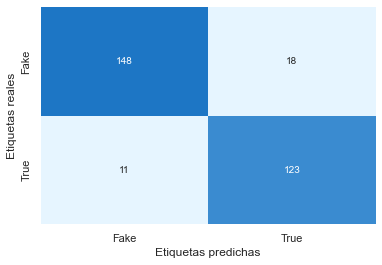

In [40]:
cm_rlog_svd = confusion_matrix(y_test, reg_model_svd.predict(X_test_svd))
sns.heatmap(cm_rlog_svd, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Decision Tree Classifier

In [41]:
my_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
my_tree.fit(X_train, y_train)
my_tree.score(X_test, y_test)

0.75

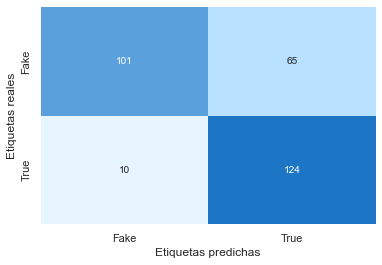

In [42]:
cm_tree = confusion_matrix(y_test, my_tree.predict(X_test))
sns.heatmap(cm_tree, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

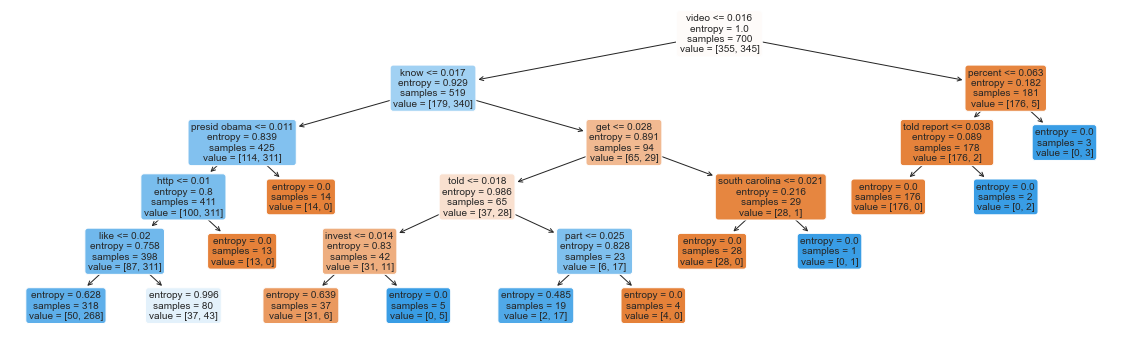

In [43]:

##### Cambio X_train_dense a X_train, por no dejar usar to_dense a un df en anotación anterior celda logistca.

plt.figure(figsize=(20,6))
tree.plot_tree(my_tree,feature_names = X_train.columns,filled=True,rounded=True, fontsize = 10)
plt.show()

## Boosting de Modelos

In [44]:
base_classifier = ExtraTreesClassifier(n_estimators=100, 
                                      criterion='gini', 
                                      max_depth = 4, 
                                      bootstrap=True, 
                                      n_jobs = -1, 
                                      random_state = 127,
                                      max_samples= 0.3)

boost_tree = AdaBoostClassifier(base_estimator = base_classifier, 
                            n_estimators = 200,
                            learning_rate = 0.8,                                       
                            random_state = 127)

boost_tree.fit(X_train, y_train) 
boost_tree.score(X_test, y_test)

0.91

Text(0.5, 12.5, 'Etiquetas predichas')

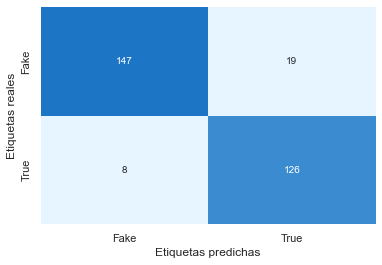

In [45]:
cm_boost_tree = confusion_matrix(y_test, boost_tree.predict(X_test))
sns.heatmap(cm_boost_tree, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')

## Pipeline

In [46]:
pasos = [('vectorizador', CountVectorizer(lowercase = True, 
                                            strip_accents='unicode',
                                          tokenizer = porter_tokenizer)), 
         ('tfidf', TfidfTransformer()), 
         ('cambio_base', TruncatedSVD(n_components)),
         ('modelo', MultinomialNB())]
pipeline = Pipeline(pasos)

In [67]:
param_grid = [{'vectorizador__ngram_range': [(1, 3), (2, 3), (3, 3), (1, 4), (2, 4), (3, 4), (4, 4)],
               'vectorizador__min_df': range(1, 4),
               'tfidf__norm': ['l1', 'l2'],
               'cambio_base': [TruncatedSVD(), None],
               'cambio_base__n_components': [n_components, X_train.shape[1] - 1],
               'modelo': [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(), ExtraTreesClassifier()]}]

In [68]:
# construir clase q metodo fit sea crear n_optimo. Tiene 3 casos, si None: N= None,
#  elif max: n= shape[1] - 1, 
# else threshold: n = n_optimo
# Transform n = None no hace nada, n = num hace la reducción de la dimensionalidad
# Generar transformer que tenga hiperparametro true y false, si true hace cuenta y
#  reduce dimensionalidad a nro optimo
# en false shape-1

In [69]:
# Este toma menos tiempo
param_grid2 = [{#'vectorizador__ngram_range': [(1, 3), (2, 3), (3, 3), (1, 4), (2, 4), (3, 4), (4, 4)],
               #'vectorizador__min_df': range(1, 4),
               #'tfidf__norm': ['l1', 'l2'],
               'cambio_base': [TruncatedSVD(), None],
               'cambio_base__n_components': [n_components, X_train.shape[1] - 1],
               'modelo': [MultinomialNB(), LogisticRegression()]}]

In [70]:
# Apróximadamente toma 10 min la ejecución con un sample de 1000 records y param_grid2
folds=StratifiedKFold(n_splits=5,shuffle=True)
grid = GridSearchCV(estimator = pipeline,param_grid = param_grid, cv = folds)
grid.fit(X_train, y_train)

ValueError: 
All the 840 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\naive_bayes.py", line 699, in fit
    X, y = self._check_X_y(X, y)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\naive_bayes.py", line 553, in _check_X_y
    return self._validate_data(X, y, accept_sparse="csr", reset=reset)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 1092, in check_X_y
    check_consistent_length(X, y)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 387, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [8844, 560]

--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\feature_extraction\text.py", line 1338, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\feature_extraction\text.py", line 1228, in _count_vocab
    raise ValueError(
ValueError: empty vocabulary; perhaps the documents only contain stop words

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\decomposition\_truncated_svd.py", line 218, in fit_transform
    X = self._validate_data(X, accept_sparse=["csr", "csc"], ensure_min_features=2)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\base.py", line 577, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 918, in check_array
    raise ValueError(
ValueError: Found array with 1 feature(s) (shape=(8844, 1)) while a minimum of 2 is required by TruncatedSVD.

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\feature_extraction\text.py", line 1355, in fit_transform
    X, self.stop_words_ = self._limit_features(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\feature_extraction\text.py", line 1187, in _limit_features
    raise ValueError(
ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\linear_model\_logistic.py", line 1138, in fit
    X, y = self._validate_data(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 1092, in check_X_y
    check_consistent_length(X, y)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 387, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [8844, 560]

--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\tree\_classes.py", line 366, in fit
    raise ValueError(
ValueError: Number of labels=560 does not match number of samples=8844

--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 1092, in check_X_y
    check_consistent_length(X, y)
  File "c:\python39\virtual_env\fakenews\lib\site-packages\sklearn\utils\validation.py", line 387, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [8844, 560]


In [ ]:
grid.best_score_

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

## Pipeline con título de las noticias (SIN contenido del texto)

In [ ]:
# Hacer el pipeline sólamente con los títulos de las noticias para ver qué pasa

## A traves de webscraping se buscan noticias para obtener más datos de testing

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options=chrome_options)

def get_text_from_url_bbc(url):
    wd.get(url)

    time.sleep(1)

    soup = BeautifulSoup(wd.page_source)
    text = soup.find_all('div', {'data-component': 'text-block'}) #(?P<text>\>(.*?)\<)
    text = reversed(text) 
    text2 = ""
    for i in text:
        try:
            text2 = i.text+text2
        except:
            text2 = ""+text2
    return text2    

In [ ]:

warnings.filterwarnings("ignore")
#https://newsapi.org/docs
response = requests.get("https://newsapi.org/v2/top-headlines?sources=bbc-news&apiKey=1f83e742c8804de0a5d427510829f79b")

list_urls = []
for i in range(0,len(response.json()['articles'])):
    list_urls.append(response.json()['articles'][i]['url'])  
    
list_texts = []
for i in range(0,len(list_urls)):
    list_texts.append(get_text_from_url_bbc(list_urls[i]))

In [ ]:
data_texts_text = pd.DataFrame(list_texts, columns=['text'])
data_texts_text['len'] = data_texts_text.text.apply(lambda x: len(x))
data_texts_text['real'] = 'True'
data_texts_text = data_texts_text[data_texts_text.len>0]
clean_texts_test = data_texts_text.text.progress_apply(lambda x: clean_review(x, tokenizer, englishStemmer, stopwords_en_stem))

X_test_sparse_texts = count_vectorizer.transform(clean_texts_test)
X_test_texts = pd.DataFrame(X_test_sparse_texts.todense(), 
             columns = count_vectorizer.get_feature_names()) 
X_test_svd_texts = svd.transform(X_test_texts)
X_test_bigram_sparse_texts = count_vectorizer_bigram.transform(clean_texts_test)

In [ ]:
data_texts_text['predict_reg_base'] = reg_model.predict(X_test_texts)
data_texts_text['predict_prob_reg_base'] = reg_model.predict_proba(X_test_texts).T[0]

data_texts_text['predict_svd'] = reg_model_svd.predict(X_test_svd_texts)
data_texts_text['predict_prob_svd'] = reg_model_svd.predict_proba(X_test_svd_texts).T[0]

data_texts_text['predict_bigram'] = reg_model_bigram.predict(X_test_bigram_sparse_texts)
data_texts_text['predict_prob_bigram'] = reg_model_bigram.predict_proba(X_test_bigram_sparse_texts).T[0]

data_texts_text['predict_my_tree'] = my_tree.predict(X_test_texts)
data_texts_text['predict_prob_my_tree'] = my_tree.predict_proba(X_test_texts).T[0]

data_texts_text

In [ ]:
X_train_explainer = np.array(X_train)
explainer = LimeTabularExplainer(X_train_explainer, 
                                 mode = "classification",
                                 training_labels = y_train,
                                 feature_names = X_train.columns,
                                 discretize_continuous=False)

#i = 13
#data_row = np.array(X_test.iloc[i])
data_row = np.array(X_test_texts.iloc[4])
explanation = explainer.explain_instance(data_row, reg_model.predict_proba, num_features=10)
explanation.as_pyplot_figure();

In [ ]:
data_texts_text.text.iloc[4]